<a href="https://colab.research.google.com/github/nickwinters1/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [1]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [3]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [4]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=122.68450767741481, mobile=False), User(purchased=True, time_on_site=116.66532031052643, mobile=True), User(purchased=True, time_on_site=116.35391458526085, mobile=True), User(purchased=True, time_on_site=313.823104148606, mobile=False), User(purchased=True, time_on_site=174.2275616929025, mobile=True), User(purchased=False, time_on_site=9.799069291932874, mobile=True), User(purchased=False, time_on_site=26.197278896417224, mobile=False), User(purchased=True, time_on_site=222.15426409275105, mobile=True), User(purchased=False, time_on_site=125.78729757509268, mobile=False), User(purchased=False, time_on_site=87.03370275198233, mobile=True)]


In [5]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,122.684508,False
1,True,116.665320,True
2,True,116.353915,True
3,True,313.823104,False
4,True,174.227562,True


In [6]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.083552389054854,5.116695410863429,5.2745569804613295,5.4349190267099265,6.0542628688347815,6.231376772577754,6.31942548457058,6.6091279866319965,6.990286292591672,7.36935299963487,...,579.2103541819431,579.9197881979363,581.066840673365,581.7824896059881,586.1028356562515,590.0076085419283,590.4283848460936,592.2115198730736,595.5320783286139,596.4266949203636
purchased,,,,,,,,,,,,,,,,,,,,,
False,0,0,1,1,1,1,0,1,1,0,...,0,1,1,0,0,1,1,1,0,0
True,1,1,0,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,1,1


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.801, 124.278]","(124.278, 243.161]","(243.161, 362.043]","(362.043, 480.926]","(480.926, 599.808]"
purchased,,,,,
False,240,233,105,29,28
True,96,131,102,20,16


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.801, 124.278]","(124.278, 243.161]","(243.161, 362.043]","(362.043, 480.926]","(480.926, 599.808]"
purchased,,,,,
False,0.714286,0.64011,0.507246,0.591837,0.636364
True,0.285714,0.35989,0.492754,0.408163,0.363636


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.672,0.622667
True,0.328,0.377333


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

  
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/nickwinters1/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-databackedassertions/persons.csv')


In [45]:
data.head()

,ID,Age,Weight,Exercise_Time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
data.columns = ['ID', 'Age', 'Weight', 'Exercise_Time']

In [46]:
data.head()

,ID,Age,Weight,Exercise_Time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [47]:
data.dtypes

ID               int64
Age              int64
Weight           int64
Exercise_Time    int64
dtype: object

In [49]:
weight_bins = pd.cut(data['Weight'], 5)  
age_bins = pd.cut(data['Age'], 10)
exercise_bins = pd.cut(data['Exercise_Time'], 3)
pd.crosstab(exercise_bins, weight_bins, normalize='columns')

Weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
Exercise_Time,,,,,
"(-0.3, 100.0]",0.245333,0.307463,0.492248,0.726257,1.0
"(100.0, 200.0]",0.333333,0.319403,0.399225,0.273743,0.0
"(200.0, 300.0]",0.421333,0.373134,0.108527,0.000000,0.0


In [50]:
pd.crosstab(exercise_bins, age_bins, normalize='columns')

Age,"(17.938, 24.2]","(24.2, 30.4]","(30.4, 36.6]","(36.6, 42.8]","(42.8, 49.0]","(49.0, 55.2]","(55.2, 61.4]","(61.4, 67.6]","(67.6, 73.8]","(73.8, 80.0]"
Exercise_Time,,,,,,,,,,
"(-0.3, 100.0]",0.318519,0.338843,0.346154,0.341463,0.341880,0.292453,0.389381,0.513761,0.557252,0.782609
"(100.0, 200.0]",0.422222,0.272727,0.330769,0.284553,0.273504,0.320755,0.309735,0.330275,0.412214,0.217391
"(200.0, 300.0]",0.259259,0.388430,0.323077,0.373984,0.384615,0.386792,0.300885,0.155963,0.030534,0.000000


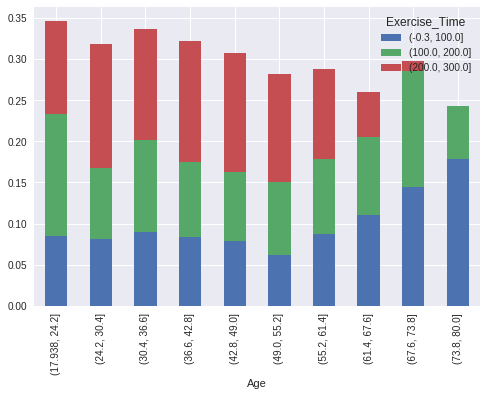

In [51]:
pd.crosstab(age_bins, exercise_bins, normalize='columns').plot(kind='bar', stacked=True)

In [0]:
#The amount of exercise per week can relate to the weight of someone
#The age and exercise time can be cofounding rekationships
#The age and weight of someone doesnt have any correlation 

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
#The varaible types are numbers

2.  What are the relationships between the variables?
#Exercise time directly relates to the weight of the person

3.  Which relationships are "real", and which spurious?
#Weight and excerise are real
#Age and exercise are spurious 
#Age and weight could be spurious or no corralation 

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)